In [0]:
import os

from fastai import *
from fastai.vision import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Setting up the paths for thr dataset and mounting Gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + "Make_Money/wk4/chest_xray"


Mounted at /content/drive


Images in Train and Test folders

In [0]:
train_pneumonia_path= Path('/content/drive/My Drive/Make_Money/wk4/chest_xray/train/PNEUMONIA')
train_normal_path = Path('/content/drive/My Drive/Make_Money/wk4/chest_xray/train/NORMAL')

In [6]:
file_names = get_image_files(train_pneumonia_path)
file_names_train_pneumonia = np.array(file_names)
file_names_train_pneumonia.shape

(3902,)

In [7]:
file_names = get_image_files(train_normal_path)
np.array(file_names).shape


(1349,)

In [0]:
test_pneumonia_path= Path('/content/drive/My Drive/Make_Money/wk4/chest_xray/test/PNEUMONIA')
test_normal_path = Path('/content/drive/My Drive/Make_Money/wk4/chest_xray/test/NORMAL')

In [9]:
file_names = get_image_files(test_pneumonia_path)
print(np.array(file_names).shape)

(390,)


In [10]:
file_names = get_image_files(test_normal_path)
print(np.array(file_names).shape)

(234,)


Create ImageBunch

In [0]:
np.random.seed(42)
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_folder('/content/drive/My Drive/Make_Money/wk4/chest_xray/train', train="train",
valid_pct=0.20, ds_tfms = tfms, classes = ['PNEUMONIA', 'NORMAL'],
bs = 64, size = 224).normalize(imagenet_stats)

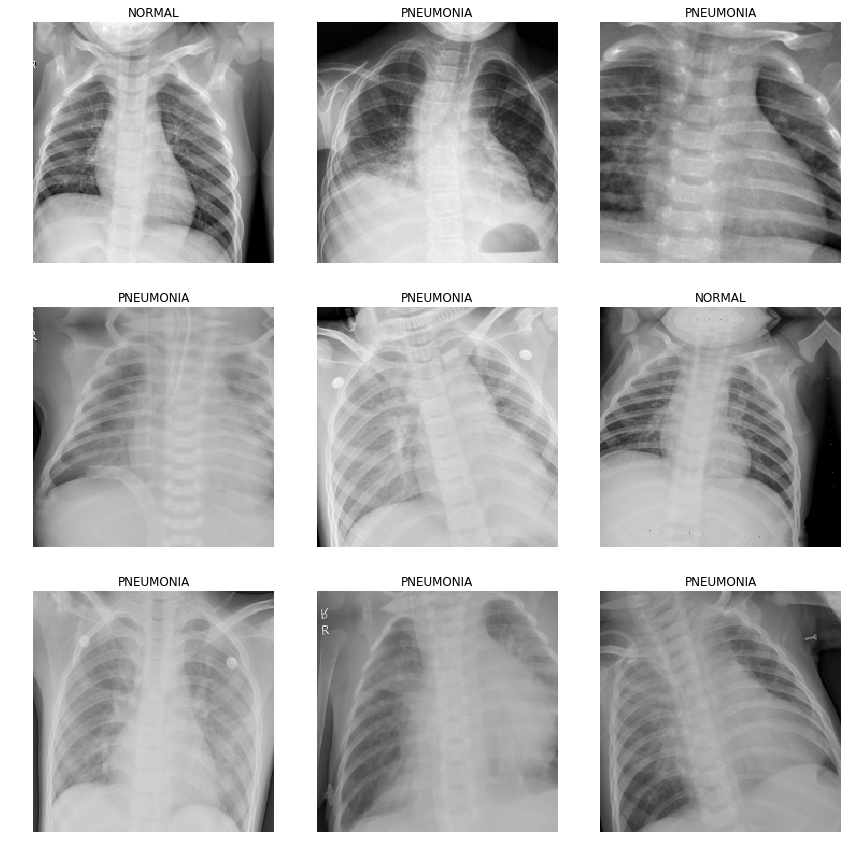

In [12]:
data.show_batch(3, figsize = (12,12))

Ttraining the model

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy,model_dir = "/temp/model/")

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.308149,0.248794,0.938095,04:21
1,0.183323,0.144558,0.952381,04:18
2,0.135151,0.144161,0.950476,04:17
3,0.114483,0.147392,0.945714,04:19


Look at where the model has the most losses (confused)

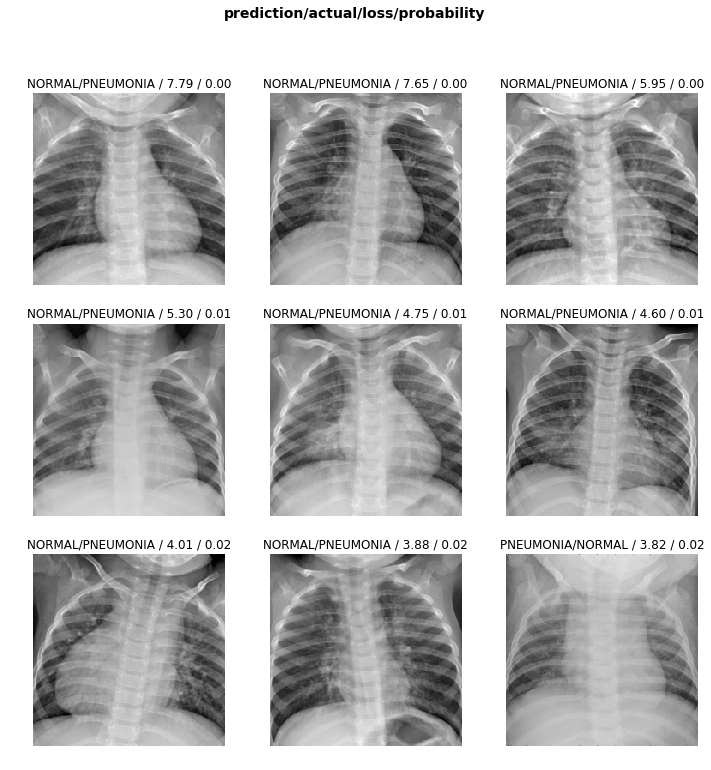

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

interp.plot_top_losses(9, figsize= (12,12))

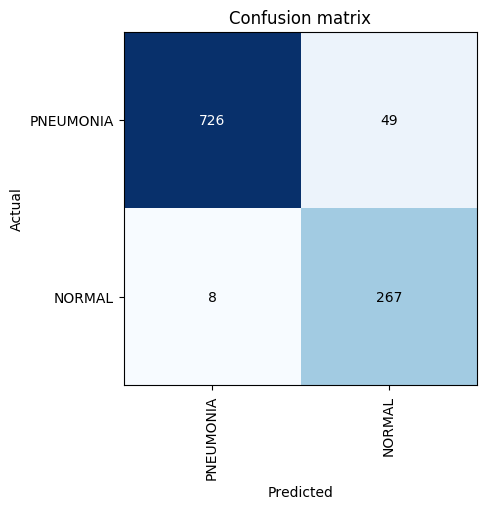

In [15]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [0]:
learn.save('stage-1')

In [39]:
267 / (267 + 49)

0.8449367088607594

In [40]:
267 / (267 + 8)

0.9709090909090909

In [41]:
2*0.9709 * .8449 / (0.9709 + 0.8449)


0.9035283731688513

Find the optimal learning rate

In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


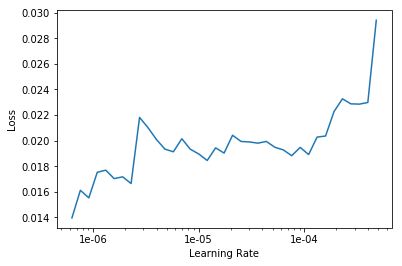

In [43]:
learn.recorder.plot()

Train again with 5 epochs

In [44]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.021248,0.094627,0.973333,04:17
1,0.024340,0.124525,0.966667,04:22
2,0.018730,0.060554,0.982857,04:25
3,0.014268,0.104691,0.974286,04:26
4,0.014733,0.085760,0.976190,04:24


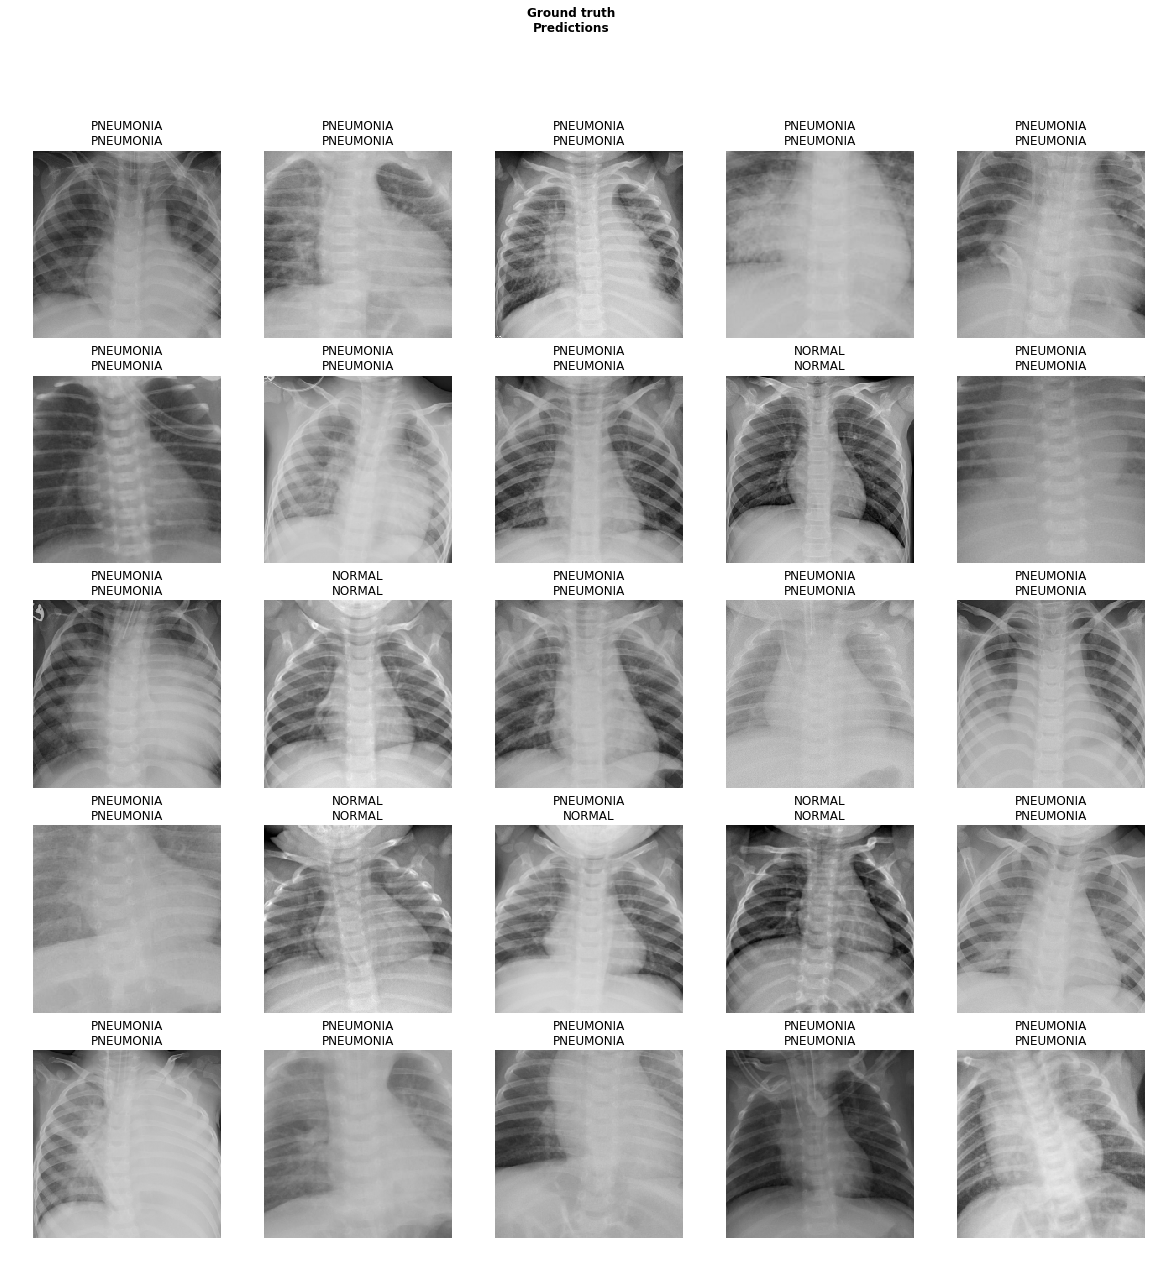

In [45]:
learn.show_results()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()


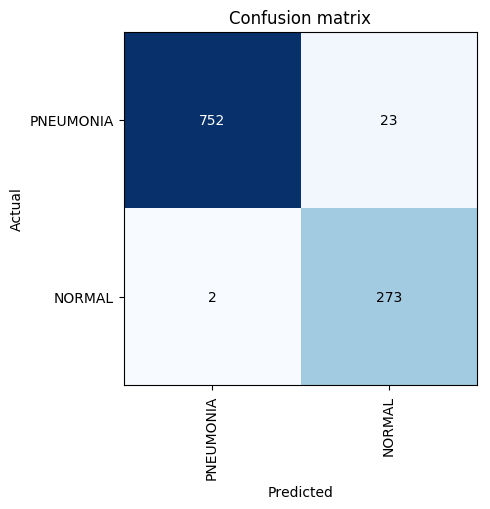

In [47]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

Final results better than before at 95.6 with less losses than before 

In [48]:
273 / (273 + 23)

0.9222972972972973

In [49]:
273 / (273 + 2)

0.9927272727272727

In [50]:
2*0.9927 * .9222 / (0.9927 + 0.9222)

0.956152216825944